In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from pathlib import Path


2025-02-18 17:10:47.722784: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-18 17:10:47.722864: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-18 17:10:47.725456: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 17:10:47.939651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [77]:
folder_path = Path('./adversarial-examples/linf/')

for file_path in list(folder_path.iterdir()):
    if file_path.is_file():
        if len(file_path.name.split('-mae'))==2:
            new_filename = file_path.name.split('-mae')[0]+'.npy'
            new_path = folder_path / new_filename
            file_path.rename(new_path)
            print(f"Renamed: {file_path} -> {new_path}")
        print(file_path, len(file_path.name.split('-mae')))

adversarial-examples/linf/iterations-200-epsilon-50-alpha-0.001.npy 1
adversarial-examples/linf/iterations-500-epsilon-10-alpha-0.01.npy 1
adversarial-examples/linf/iterations-500-epsilon-10-alpha-0.0003.npy 1
adversarial-examples/linf/iterations-500-epsilon-500-alpha-0.0001.npy 1
adversarial-examples/linf/iterations-100-epsilon-50-alpha-0.3.npy 1
Renamed: adversarial-examples/linf/iterations-50-epsilon-1000-alpha-0.03-mae=3974.8818359375.npy -> adversarial-examples/linf/iterations-50-epsilon-1000-alpha-0.03.npy
adversarial-examples/linf/iterations-50-epsilon-1000-alpha-0.03-mae=3974.8818359375.npy 2
adversarial-examples/linf/iterations-100-epsilon-10-alpha-0.01.npy 1
adversarial-examples/linf/iterations-50-epsilon-1000-alpha-3.npy 1
adversarial-examples/linf/iterations-50-epsilon-100-alpha-0.03.npy 1
adversarial-examples/linf/iterations-500-epsilon-100-alpha-0.01.npy 1
adversarial-examples/linf/iterations-100-epsilon-50-alpha-3.npy 1
adversarial-examples/linf/iterations-50-epsilon-50-

In [4]:
folder_path = Path('./results/linf/')
desired_extension = '.pkl'

file_path = list(folder_path.iterdir())[0]
df = pd.read_pickle(file_path)
df.MAE.iloc[0]

for file_path in list(folder_path.iterdir()):
    if file_path.is_file() and file_path.suffix == desired_extension:
        df1 = pd.read_pickle(file_path)
        df = pd.concat([df, df1])
        print(file_path)
        

results/linf/iterations-200-epsilon-1000-alpha-0.0001-mae=568.0165405273438.pkl
results/linf/iterations-200-epsilon-100-alpha-0.0001-mae=568.0165405273438.pkl
results/linf/iterations-50-epsilon-10-alpha-0.01-mae=60.00370407104492.pkl
results/linf/iterations-500-epsilon-50-alpha-0.0003-mae=394.1190490722656.pkl
results/linf/iterations-50-epsilon-1000-alpha-0.03-mae=3974.8818359375.pkl
results/linf/iterations-200-epsilon-1000-alpha-0.1-mae=2955.7041015625.pkl
results/linf/iterations-200-epsilon-50-alpha-0.01-mae=383.56982421875.pkl
results/linf/iterations-50-epsilon-50-alpha-0.0003-mae=325.183837890625.pkl
results/linf/iterations-100-epsilon-50-alpha-3-mae=333.80908203125.pkl
results/linf/iterations-200-epsilon-1000-alpha-0.0003-mae=1329.58642578125.pkl
results/linf/iterations-50-epsilon-10-alpha-0.03-mae=60.00370407104492.pkl
results/linf/iterations-50-epsilon-500-alpha-0.001-mae=1186.3941650390625.pkl
results/linf/iterations-100-epsilon-1000-alpha-0.0001-mae=270.1822509765625.pkl
resul

2024-01-04 16:03:04.661674: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-04 16:03:04.661734: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: GPU-labor
2024-01-04 16:03:04.661752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: GPU-labor
2024-01-04 16:03:04.661915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 545.23.8
2024-01-04 16:03:04.661965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 545.23.8
2024-01-04 16:03:04.661977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 545.23.8


# $L_\infty$ attack

In [37]:
df
df['MAE_avg'] = df.MAE.apply(lambda x: (tf.reduce_sum(x)/len(x)).numpy())
df['MAE_max'] = df.MAE.apply(lambda x: tf.reduce_max(x).numpy())
df['MAE_min'] = df.MAE.apply(lambda x: tf.reduce_min(x).numpy())
df['MAE_argmax'] = df.MAE.apply(lambda x: tf.argmax(x).numpy())
df['MAE_argmin'] = df.MAE.apply(lambda x: tf.argmin(x).numpy())

In [123]:
e10 = df[df['l_inf_norm'] == 10].sort_values('MAE_avg', ascending=False).iloc[0]

In [124]:
e50 = df[df['l_inf_norm'] == 50].sort_values('MAE_avg', ascending=False).iloc[0]

In [125]:
e100 = df[df['l_inf_norm'] == 100].sort_values('MAE_avg', ascending=False).iloc[0]

In [126]:
e500 = df[df['l_inf_norm'] == 500].sort_values('MAE_avg', ascending=False).iloc[0]

In [127]:
e1000 = df[df['l_inf_norm'] == 1000].sort_values('MAE_avg', ascending=False).iloc[0]

In [146]:
table = pd.concat([e10,e50,e100,e500,e1000], axis=1).T[['l_inf_norm', 'MAE_avg', 'MAE_max', 'MAE_min']]
table = table.astype('float').round(2)
table.l_inf_norm = table.l_inf_norm.astype(int)
table.to_latex('tables/pgd-epsilon.tex',index=False)

In [117]:
iterations = 500
alpha = 0.01
epsilon = 500
adv_input = np.load(f'./adversarial-examples/linf/iterations-{iterations}-epsilon-{epsilon}-alpha-{alpha}.npy')

In [118]:
y_hat = m.predict(x)
y_hat_adv = m.predict(adv_input)

4/4 [==============================] - 0s 72ms/step


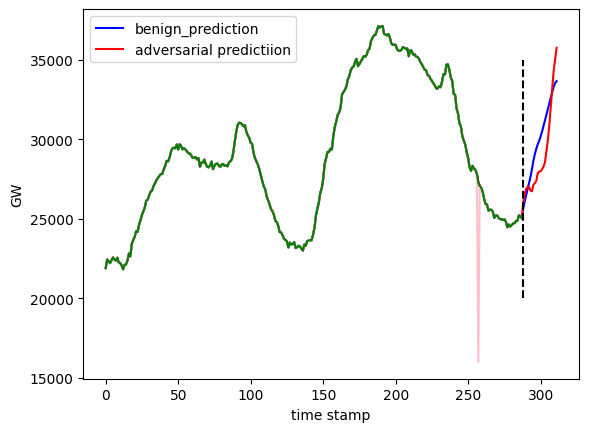

In [411]:
i = 30
#plot_forecast(x,y_hat,y_hat_adv,i, aa=adv_input,savename=f'linf-eps-{epsilon}')
plot_forecast(x,y_hat,y_hat_adv,i, aa=adv_input,savename=None)

# $L_0$ attack

In [393]:
folder_path = Path('./results/l0/')
desired_extension = '.pkl'

file_path = list(folder_path.iterdir())[0]
df = pd.read_pickle(file_path)
df.MAE.iloc[0]

for file_path in list(folder_path.iterdir()):
    if file_path.is_file() and file_path.suffix == desired_extension:
        df1 = pd.read_pickle(file_path)
        df = pd.concat([df, df1])
        print(file_path)
        

results/l0/l2_c-5.25-l2_iter-500-l2_lr-0.03-unmasked-230-mae=6695.078125.pkl
results/l0/l2_c-5.25-l2_iter-100-l2_lr-0.03-unmasked-1-mae=7.247034072875977.pkl
results/l0/l2_c-5.25-l2_iter-1000-l2_lr-0.3-unmasked-47-mae=55504.56640625.pkl
results/l0/l2_c-5.5-l2_iter-300-l2_lr-0.3-unmasked-288-mae=80313.40625.pkl
results/l0/l2_c-6-l2_iter-100-l2_lr-0.3-unmasked-117-mae=20853.27734375.pkl
results/l0/l2_c-5.5-l2_iter-100-l2_lr-0.03-unmasked-18-mae=121.66783905029297.pkl
results/l0/l2_c-5.75-l2_iter-500-l2_lr-0.03-unmasked-93-mae=4095.022216796875.pkl
results/l0/l2_c-5-l2_iter-100-l2_lr-0.001-unmasked-93-mae=41.84356689453125.pkl
results/l0/l2_c-5.75-l2_iter-1000-l2_lr-0.001-unmasked-1-mae=8.276259422302246.pkl
results/l0/l2_c-6-l2_iter-100-l2_lr-0.03-unmasked-59-mae=637.7852172851562.pkl
results/l0/l2_c-5.5-l2_iter-100-l2_lr-0.03-unmasked-59-mae=501.4005126953125.pkl
results/l0/l2_c-5.5-l2_iter-500-l2_lr-0.001-unmasked-3-mae=11.811066627502441.pkl
results/l0/l2_c-5.75-l2_iter-300-l2_lr-0.01

In [394]:
df = df.drop_duplicates(('l2_iter', 'l2_lr', 'l2_constant', 'l0_norm'))

In [397]:
df['MAE_avg'] = df.MAE.apply(lambda x: (tf.reduce_sum(x)/len(x)).numpy())
df['MAE_max'] = df.MAE.apply(lambda x: tf.reduce_max(x).numpy())
df['MAE_min'] = df.MAE.apply(lambda x: tf.reduce_min(x).numpy())
df['MAE_argmax'] = df.MAE.apply(lambda x: tf.argmax(x).numpy())
df['MAE_argmin'] = df.MAE.apply(lambda x: tf.argmin(x).numpy())

In [398]:
df.sort_values(['l2_iter','l2_lr','l2_constant', 'l0_norm'])

,l2_iter,l2_lr,l2_constant,l0_norm,MAE,duration,MAE_avg,MAE_max,MAE_min,MAE_argmax,MAE_argmin
20,100,0.001,5.0,1,"(tf.Tensor(0.8766276, shape=(), dtype=float32)...",-232.507699,3.877863,3.013924e+01,0.000000,19,6
19,100,0.001,5.0,2,"(tf.Tensor(1.082194, shape=(), dtype=float32),...",-221.413098,6.054012,7.996053e+01,0.000000,12,13
18,100,0.001,5.0,3,"(tf.Tensor(1.4210612, shape=(), dtype=float32)...",-210.353265,7.051724,9.762418e+01,0.000000,12,13
17,100,0.001,5.0,4,"(tf.Tensor(3.9160156, shape=(), dtype=float32)...",-199.272717,8.724003,8.416675e+01,0.000000,12,20
16,100,0.001,5.0,6,"(tf.Tensor(1.1747233, shape=(), dtype=float32)...",-188.206090,9.987531,6.250944e+01,0.000000,12,20
...,...,...,...,...,...,...,...,...,...,...,...
4,1000,0.300,6.0,117,"(tf.Tensor(676894.44, shape=(), dtype=float32)...",-542.832214,231919.812500,7.303761e+05,23364.078125,122,47
3,1000,0.300,6.0,147,"(tf.Tensor(595588.0, shape=(), dtype=float32),...",-434.222164,245043.375000,5.955880e+05,6038.945801,0,115
2,1000,0.300,6.0,184,"(tf.Tensor(553508.7, shape=(), dtype=float32),...",-325.751760,353504.093750,9.786002e+05,31839.343750,11,111
1,1000,0.300,6.0,230,"(tf.Tensor(1000406.3, shape=(), dtype=float32)...",-217.202101,495888.000000,1.324221e+06,60796.433594,86,83


In [399]:
dfs = dict()
for l0 in df.l0_norm.unique()[1:]:
    dfs[l0] =  df[df.l0_norm==l0].sort_values('MAE_avg', ascending=False).iloc[0]
table = pd.concat(list(dfs.values()), axis=1).T[['l2_iter','l2_lr','l2_constant','l0_norm','MAE', 'MAE_avg', 'MAE_max', 'MAE_min', 'MAE_argmax', 'MAE_argmin']]
#table = table.astype('float').round(2)
table.l0_norm = table.l0_norm.astype(int)
#table.to_latex('tables/L0-epsilon.tex',index=False)
table

,l2_iter,l2_lr,l2_constant,l0_norm,MAE,MAE_avg,MAE_max,MAE_min,MAE_argmax,MAE_argmin
1,1000,0.3,6.0,230,"(tf.Tensor(1000406.3, shape=(), dtype=float32)...",495888.0,1324220.625,60796.433594,86,83
2,1000,0.3,5.75,184,"(tf.Tensor(764822.0, shape=(), dtype=float32),...",405817.09375,1149335.875,17032.732422,15,121
3,1000,0.3,5.75,147,"(tf.Tensor(601217.25, shape=(), dtype=float32)...",251935.71875,858127.75,20255.175781,22,44
4,1000,0.3,6.0,117,"(tf.Tensor(676894.44, shape=(), dtype=float32)...",231919.8125,730376.0625,23364.078125,122,47
5,1000,0.3,6.0,93,"(tf.Tensor(592721.3, shape=(), dtype=float32),...",177617.484375,592721.3125,11760.223633,0,20
6,1000,0.3,6.0,74,"(tf.Tensor(64658.355, shape=(), dtype=float32)...",114704.859375,436748.59375,6874.666504,121,120
7,1000,0.3,6.0,59,"(tf.Tensor(157534.17, shape=(), dtype=float32)...",92473.828125,264703.375,8261.504883,13,82
8,1000,0.3,6.0,47,"(tf.Tensor(28144.611, shape=(), dtype=float32)...",69620.125,269213.15625,7793.60791,86,62
9,1000,0.3,5.75,37,"(tf.Tensor(113243.22, shape=(), dtype=float32)...",59670.136719,212176.984375,8346.423828,117,88
10,1000,0.3,5.5,29,"(tf.Tensor(88781.56, shape=(), dtype=float32),...",55246.296875,167949.390625,9600.304688,103,27


In [400]:
iterations = 1000
constant = 6
lr = 0.3
epsilon = 1
adv_input = np.load(f'./adversarial-examples/l0/l2_c-{constant}-l2_iter-{iterations}-l2_lr-{lr}-unmasked-{epsilon}.npy')

In [401]:
y_hat = m.predict(x)
y_hat_adv = m.predict(adv_input)

4/4 [==============================] - 0s 63ms/step


[287] [154868.1875]


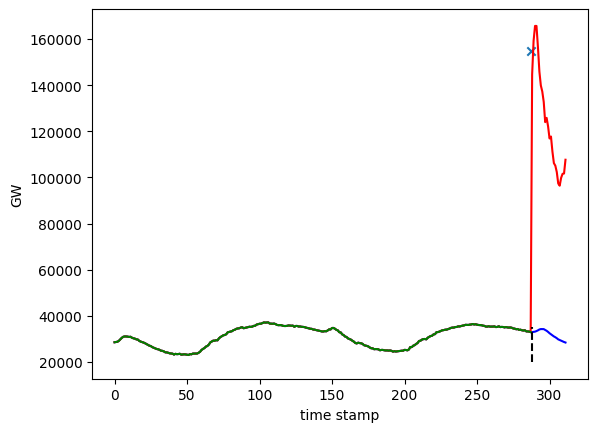

In [408]:
i = 115
#plot_forecast_l0(x,y_hat,y_hat_adv,i, aa=adv_input,savename=f'l0-eps-{epsilon}')
plot_forecast_l0(x,y_hat,y_hat_adv,i, aa=adv_input,savename=None)
plt.show()

# $L_2$ Attack

In [478]:
folder_path = Path('./results/l2/')
desired_extension = '.pkl'

file_path = list(folder_path.iterdir())[0]
df = pd.read_pickle(file_path)
df.MAE.iloc[0]

for file_path in list(folder_path.iterdir()):
    if file_path.is_file() and file_path.suffix == desired_extension:
        df1 = pd.read_pickle(file_path)
        df = pd.concat([df, df1])
df['l2_norm'] = df.l2_norm.apply(lambda x: x.numpy().item())
df['MAE_avg'] = df.MAE.apply(lambda x: (tf.reduce_sum(x)/len(x)).numpy())
df['MAE_max'] = df.MAE.apply(lambda x: tf.reduce_max(x).numpy())
df['MAE_min'] = df.MAE.apply(lambda x: tf.reduce_min(x).numpy())
df['MAE_argmax'] = df.MAE.apply(lambda x: tf.argmax(x).numpy())
df['MAE_argmin'] = df.MAE.apply(lambda x: tf.argmin(x).numpy())
df['ratio'] = df.apply(lambda x: (x.l2_norm/x.MAE_avg), axis=1)

In [479]:

df = df[df.l2_norm<50].sort_values('MAE_max', ascending=False)
df

,l2_iter,l2_lr,l2_constant,l2_norm,MAE,duration,MAE_avg,MAE_max,MAE_min,MAE_argmax,MAE_argmin,ratio
0,100,0.010,5.25,37.074722,"(tf.Tensor(189.198, shape=(), dtype=float32), ...",-10.443065,791.429199,2508.529541,86.040367,78,3,0.046845
0,100,0.010,5.75,36.357513,"(tf.Tensor(105.342125, shape=(), dtype=float32...",-10.441241,777.660889,2363.599121,84.478920,71,37,0.046752
0,100,0.010,6.00,36.313477,"(tf.Tensor(815.10504, shape=(), dtype=float32)...",-10.438398,793.092163,2266.777588,124.344398,78,4,0.045787
0,100,0.010,5.50,36.782585,"(tf.Tensor(863.5713, shape=(), dtype=float32),...",-10.458606,806.234375,2139.785889,140.195312,75,60,0.045623
0,100,0.010,5.00,37.463005,"(tf.Tensor(349.62085, shape=(), dtype=float32)...",-10.492783,807.026733,2093.335205,76.904869,71,38,0.046421
0,300,0.001,5.75,6.883984,"(tf.Tensor(46.353596, shape=(), dtype=float32)...",-30.906447,165.145508,1676.149048,21.593668,16,47,0.041684
0,300,0.001,6.00,6.999316,"(tf.Tensor(175.79802, shape=(), dtype=float32)...",-30.877666,148.833572,1422.113281,22.259766,17,55,0.047028
0,500,0.001,6.00,9.351570,"(tf.Tensor(217.2994, shape=(), dtype=float32),...",-51.372827,225.700607,1247.583252,18.372070,32,90,0.041434
0,100,0.001,5.00,4.513924,"(tf.Tensor(132.78792, shape=(), dtype=float32)...",-10.461396,109.852409,1178.171997,13.197103,20,6,0.041091
0,1000,0.001,5.00,12.850146,"(tf.Tensor(290.2964, shape=(), dtype=float32),...",-102.662205,250.324905,1156.364868,19.013346,102,47,0.051334


In [480]:
row = df.iloc[0]
const=row.l2_constant
iterations=row.l2_iter
lr = row.l2_lr
adv_input = np.load(f'./adversarial-examples/l2/l2_c-{const}-l2_iter-{iterations}-l2_lr-{lr}.npy')

In [481]:
y_hat = m.predict(x)
y_hat_adv = m.predict(adv_input)

4/4 [==============================] - 0s 67ms/step


In [482]:
row

l2_iter                                                      100
l2_lr                                                       0.01
l2_constant                                                 5.25
l2_norm                                                37.074722
MAE            (tf.Tensor(189.198, shape=(), dtype=float32), ...
duration                                              -10.443065
MAE_avg                                               791.429199
MAE_max                                              2508.529541
MAE_min                                                86.040367
MAE_argmax                                                    78
MAE_argmin                                                     3
ratio                                                   0.046845
Name: 0, dtype: object

15470


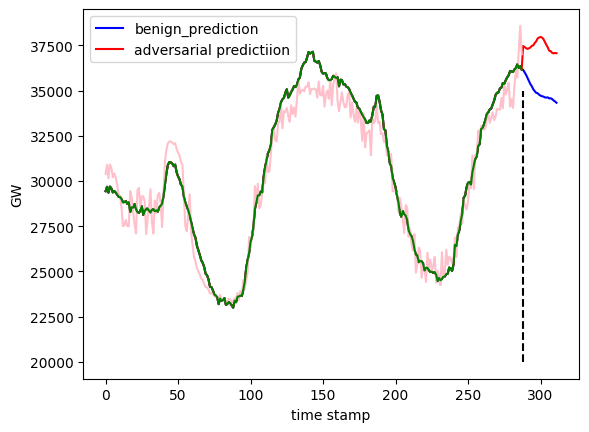

In [483]:
i = 78
denorm_x = normalization.denormalize(x[i], norm_params)
denorm_adv_input = normalization.denormalize(adv_input[i], norm_params)
epsilon = str(int(np.linalg.norm(denorm_x-denorm_adv_input)))
print(epsilon)
#plot_forecast(x,y_hat,y_hat_adv,i, aa=adv_input,savename=f'l2-eps-{epsilon}-1')
plot_forecast(x,y_hat,y_hat_adv,i, aa=adv_input,savename=None)
plt.show()

In [486]:
denorm_pert = normalization.denormalize(adv_input, norm_params)-normalization.denormalize(x, norm_params)
row.l2_norm_denorm = np.average(np.linalg.norm(denorm_pert, axis=1))
row.l2_norm_denorm

15052.797

In [503]:
df.iloc[[0,5,7,8]][['l2_norm','MAE_avg', 'MAE_max', 'MAE_min']].astype(float).round(2).sort_values('l2_norm').to_latex('tables/l2_epsilon.tex')


In [494]:
df

,l2_iter,l2_lr,l2_constant,l2_norm,MAE,duration,MAE_avg,MAE_max,MAE_min,MAE_argmax,MAE_argmin,ratio
0,100,0.010,5.25,15052.797118,"(tf.Tensor(189.198, shape=(), dtype=float32), ...",-10.443065,791.429199,2508.529541,86.040367,78,3,0.046845
0,100,0.010,5.75,14761.601424,"(tf.Tensor(105.342125, shape=(), dtype=float32...",-10.441241,777.660889,2363.599121,84.478920,71,37,0.046752
0,100,0.010,6.00,14743.721910,"(tf.Tensor(815.10504, shape=(), dtype=float32)...",-10.438398,793.092163,2266.777588,124.344398,78,4,0.045787
0,100,0.010,5.50,14934.185813,"(tf.Tensor(863.5713, shape=(), dtype=float32),...",-10.458606,806.234375,2139.785889,140.195312,75,60,0.045623
0,100,0.010,5.00,15210.444741,"(tf.Tensor(349.62085, shape=(), dtype=float32)...",-10.492783,807.026733,2093.335205,76.904869,71,38,0.046421
0,300,0.001,5.75,2794.982734,"(tf.Tensor(46.353596, shape=(), dtype=float32)...",-30.906447,165.145508,1676.149048,21.593668,16,47,0.041684
0,300,0.001,6.00,2841.809202,"(tf.Tensor(175.79802, shape=(), dtype=float32)...",-30.877666,148.833572,1422.113281,22.259766,17,55,0.047028
0,500,0.001,6.00,3796.853468,"(tf.Tensor(217.2994, shape=(), dtype=float32),...",-51.372827,225.700607,1247.583252,18.372070,32,90,0.041434
0,100,0.001,5.00,1832.708990,"(tf.Tensor(132.78792, shape=(), dtype=float32)...",-10.461396,109.852409,1178.171997,13.197103,20,6,0.041091
0,1000,0.001,5.00,5217.318786,"(tf.Tensor(290.2964, shape=(), dtype=float32),...",-102.662205,250.324905,1156.364868,19.013346,102,47,0.051334


### Visualize Adv Forecast

In [25]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import numpy as np
from src.models import lstm, tcn
from src.utils import auxiliary_plots, metrics
from src.utils.print_functions import notify_slack
from src.preprocessing import normalization, data_generation
import itertools
import pandas as pd
#device='cuda'
import time

In [26]:
norm_params = {'mean': 28505.41, 'std': 4596.946, 'max': 41217.0, 'min': 17714.0}
batch_size=128
past_history = 288
forecast_horizon = 24

test_file_name='data/hourly_20140102_20191101_test.csv'

# Read test data file
with open(test_file_name, 'r') as datafile:
    ts_test = datafile.readlines()[1:]  # skip the header
    ts_test = np.asarray([np.asarray(l.rstrip().split(',')[0], dtype=np.float32) for l in ts_test])
    ts_test = np.reshape(ts_test, (ts_test.shape[0],))

# Normalize training data
#norm_params = normalization.get_normalization_params(ts_train)
# Normalize test data with train params
ts_test = normalization.normalize(ts_test, norm_params)

x_test, y_test = data_generation.univariate_data(ts_test, 0, ts_test.shape[0], past_history, forecast_horizon)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
x = next(iter(test_data))[0]
y = next(iter(test_data))[1]


[-30.80236]
[-22.553333]
[158, 196] [-113091.375, -75171.046875]


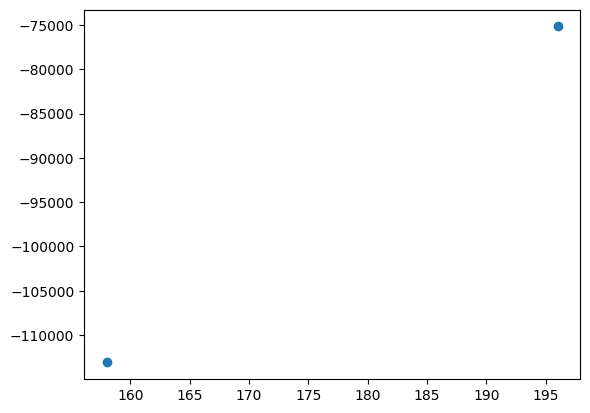

In [244]:
x[0][158],adv_input[0][158]
x_vals = []
y_vals = []
for xxx in (x[0]-adv_input[0]).numpy().nonzero()[0]:
    print(adv_input[0][xxx])
    x_vals.append(xxx)
    y_vals.append(normalization.denormalize(adv_input[0][xxx], norm_params).item())
print(x_vals, y_vals)
plt.scatter(x_vals, y_vals)

In [265]:
def plot_forecast_l0(x,y,preds,i, aa=None, savename=None):
    x_and_y = tf.concat((x[i], tf.expand_dims(y[i], -1)), axis=0)
    x_and_preds = tf.concat((x[i], tf.expand_dims(preds[i], -1)), axis=0)
    plt.plot(normalization.denormalize(x_and_y, norm_params), color='b')
    plt.plot(normalization.denormalize(x_and_preds, norm_params), color='r')
    if aa is not None:
        x_vals = []
        y_vals = []
        for xxx in (x[i]-aa[i]).numpy().nonzero()[0]:
            x_vals.append(xxx)
            y_vals.append(normalization.denormalize(aa[i][xxx], norm_params).item())
        print(x_vals, y_vals)
        plt.scatter(x_vals, y_vals, marker='x')
    plt.plot(normalization.denormalize(x[i], norm_params), color='g')
    plt.vlines(288, ymin=20000, ymax=35000, color='black', linestyles='--')
    #plt.ylim(20000, 40000)
    plt.xlabel('time stamp')
    plt.ylabel('GW')
    if savename != None:
        tikzplotlib.save('./figures/'+savename+'-i-'+str(i)+'.tex')
        plt.savefig('./figures/'+savename+'-i-'+str(i)+'.png')
    

In [410]:
def plot_forecast(x,y,preds,i, aa=None, savename=None):
    x_and_y = tf.concat((x[i], tf.expand_dims(y[i], -1)), axis=0)
    x_and_preds = tf.concat((x[i], tf.expand_dims(preds[i], -1)), axis=0)
    plt.plot(normalization.denormalize(x_and_y, norm_params), color='b', label='benign_prediction')
    plt.plot(normalization.denormalize(x_and_preds, norm_params), color='r', label='adversarial predictiion')
    if aa is not None: plt.plot(normalization.denormalize(aa[i], norm_params), color='pink')
    plt.plot(normalization.denormalize(x[i], norm_params), color='g')
    plt.vlines(288, ymin=20000, ymax=35000, color='black', linestyles='--')
    #plt.ylim(20000, 40000)
    plt.xlabel('time stamp')
    plt.ylabel('GW')
    plt.legend()
    if savename != None:
        tikzplotlib.save('./figures/'+savename+'-i-'+str(i)+'.tex')
        plt.savefig('./figures/'+savename+'-i-'+str(i)+'.png')
    

In [29]:
m = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-9-12-31_22-39-15.ckpt/')

In [161]:
c = 5
iter = 1000
lr = 0.3
l0_norm = 1
adv_input = np.load(f'./adversarial-examples/l0/l2_c-{c}-l2_iter-{iter}-l2_lr-{lr}-unmasked-{l0_norm}.npy')

In [162]:
y_hat = m.predict(x)
y_hat_adv = m.predict(adv_input)

4/4 [==============================] - 0s 58ms/step


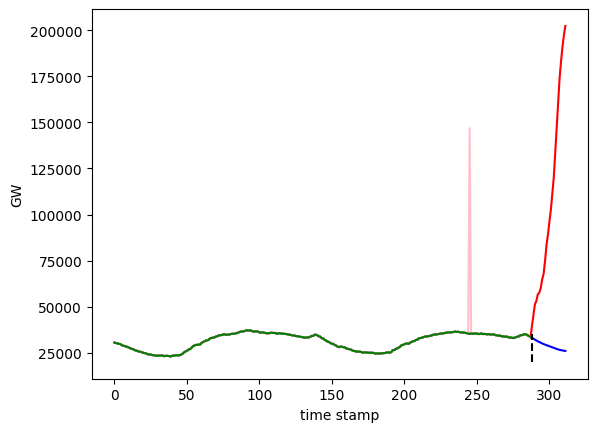

In [163]:
i = 127
plot_forecast(x,y_hat,y_hat_adv,i, aa=adv_input )

In [202]:
def calc_denormalized_mae(m, x, advs):
    y_hat_adv = m.predict(advs)
    y_hat = m.predict(x)
    denormalized_y_hat_adv = normalization.denormalize(y_hat_adv, norm_params)
    denormalized_y_hat = normalization.denormalize(y_hat,norm_params)
    return tf.keras.losses.mean_absolute_error(denormalized_y_hat_adv,denormalized_y_hat), tf.reduce_sum(tf.keras.losses.mean_absolute_error(denormalized_y_hat_adv,denormalized_y_hat))/len(denormalized_y_hat)

In [152]:
maes, mae_avg = calc_denormalized_mae(m, x, adv_input)
maes, mae_avg

4/4 [==============================] - 0s 71ms/step


(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([6.0106525e+02, 6.7756777e+03, 1.2000814e+02, 3.4700535e+03,
        6.2345688e+03, 5.1525693e+03, 8.7840312e+03, 3.1648450e+03,
        1.5695226e+04, 2.4145260e+04, 1.1559500e+03, 1.5381805e+04,
        1.5951278e+04, 2.8617549e+03, 5.4762871e+03, 7.0707603e+01,
        2.8301358e+02, 1.0845255e+04, 3.2422266e+02, 2.4871182e+03,
        2.7520594e+04, 7.6726099e+03, 1.2187279e+03, 6.9476581e+02,
        2.1348955e+04, 1.5831984e+04, 1.1091901e+04, 3.6211312e+04,
        2.4591369e+04, 6.0386812e+03, 1.4274555e+04, 5.2265965e+04,
        2.6325808e+03, 1.5153925e+04, 1.4425617e+04, 3.5801907e+03,
        7.7471477e+04, 3.4084027e+04, 7.9840054e+03, 1.3860477e+04,
        7.7395864e+03, 2.8589835e+02, 2.7932094e+04, 3.7437122e+03,
        9.8268486e+03, 2.4247045e+04, 2.3022209e+04, 4.6445848e+04,
        7.2254219e+03, 3.8878730e+04, 8.3273584e+03, 1.2613330e+02,
        1.6408896e+04, 1.4311653e+02, 9.8030635e+03, 2.0743230e+04,

In [158]:
denormalized_y_hat_adv = normalization.denormalize(y_hat_adv, norm_params)
denormalized_y_hat = normalization.denormalize(y_hat,norm_params)
denormalized_y_hat_adv[127],denormalized_y_hat[127]

(array([ 39742.797,  45313.46 ,  51269.79 ,  53040.918,  56701.062,
         57538.516,  60023.766,  64759.664,  67782.234,  74847.28 ,
         83562.79 ,  89086.4  ,  96132.56 , 102542.31 , 111103.81 ,
        119951.39 , 133291.25 , 146062.28 , 159537.06 , 173765.03 ,
        182969.1  , 190886.4  , 197338.39 , 202339.78 ], dtype=float32),
 array([33081.63 , 32582.123, 32067.787, 31625.785, 31168.236, 30785.805,
        30398.193, 30008.31 , 29687.87 , 29365.857, 29093.414, 28800.828,
        28481.656, 28201.328, 27938.191, 27614.871, 27328.219, 27063.527,
        26772.857, 26567.059, 26405.885, 26211.62 , 26068.324, 25945.008],
       dtype=float32))